# Notebook activity 4.7 A regression model with two factors for the wages dataset

In this notebook activity, we will use R to fit a model for the response `hourlyWageSqrt` from the wages dataset (Subsection 1.1, Unit 3), taking the factors `gender` and `computer` as explanatory variables. As a reminder, the variables are as follows:

* `hourlyWageSqrt`: the square root of the individual's hourly wage (in £)
* `gender`:  the gender the individual identifies with, taking the values male and female
* `computer`: whether the individual has access to a computer at home, taking the values yes and no.

The data for these variables are stored in the `wages` data frame.

## (a) Getting started

### (i)

Start by loading the `M348` package, loading the `wages` data frame, and checking that `wages` has loaded correctly, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the wages data frame
data(wages)
# Check the data frame has loaded OK
head(wages)

### (ii)

Check that both `gender` and `computer` are factors by running the following code.

In [ ]:
class(wages$gender)
class(wages$computer)

### (iii)

Check that level 1 of `gender` corresponds to male and that level 1 of `computer` corresponds to yes.

In [ ]:
levels(wages$gender)
levels(wages$computer)

## (b) Fitting the model

### (i)  

Use the empty code cell below to fit a regression model for the response `hourlyWageSqrt` with the factors `gender` and `computer` as explanatory variables, storing the results of the fitting in the object `wageFitGenderComputer`. Produce a summary of the results. 

#### Solution <a class="tocSkip">

The required code and results are given below.

In [4]:
# Fitting the model hourlyWageSqrt ~ gender + computer
wageFitGenderComputer <- lm(hourlyWageSqrt ~ gender + computer, data = wages)
# Obtaining a summary of the model fit
summary(wageFitGenderComputer)


Call:
lm(formula = hourlyWageSqrt ~ gender + computer, data = wages)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5901 -0.6325 -0.0579  0.6204  3.5479 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.04011    0.03018 133.887   <2e-16 ***
genderfemale -0.51189    0.04465 -11.463   <2e-16 ***
computerno   -0.33068    0.03745  -8.829   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.015 on 3328 degrees of freedom
Multiple R-squared:  0.07017,	Adjusted R-squared:  0.06961 
F-statistic: 125.6 on 2 and 3328 DF,  p-value: < 2.2e-16


### (ii)

Using the `Coefficients` table you obtained in part (i), calculate the following fitted values of `hourlyWageSqrt` ($Y$):
* $\widehat{y}_3$ - corresponding to a female with no computer, 
* $\widehat{y}_5$ - corresponding to a male with a computer.

#### Solution <a class="tocSkip">

The fitted value of `hourlyWageSqrt`, $\widehat{y}_3$, corresponding to a female with no computer is calculated as:

\begin{equation*} \begin{align*}
\widehat{y}_3 & = \{\text{baseline mean}\} + \{\text{effect of female}\} + \{\text{effect of no}\} \\
 & = 4.04011 -0.51189 -0.33068 \\
 & = 3.19754 \simeq 3.20.
\end{align*} \end{equation*}

$\widehat{y}_5$ corresponds to a male with a computer so both `gender` and `computer` are level 1. This means that fitted value of `hourlyWageSqrt` is simply the baseline mean: 4.04 (to two decimal places).

### (iii)

Using the following code, which obtains the fitted values for the third and fifth individuals directly, check the answers you obtained in part (ii).

In [ ]:
fitted.values(wageFitGenderComputer)[c(3,5)]

## (c) Testing the model

### (i)

Use the empty code cell below to fit the following two models:

* `hourlyWageSqrt ~ gender` (storing the results in `wageFitGender`)
*  `hourlyWageSqrt ~ computer` (storing the results in `wageFitComputer`)

and to obtain the results from ANOVA tests to check whether both `gender` and `computer` should be included in the model. 

(You will need four lines of code for this.)

#### Solution <a class="tocSkip">

The required code and corresponding results are given below. 

In [6]:
# Fit model hourlyWageSqrt ~ gender
wageFitGender <- lm(hourlyWageSqrt ~ gender, data = wages)

# Fit model hourlyWageSqrt ~ computer
wageFitComputer <- lm(hourlyWageSqrt ~ computer, data = wages)

# Carry out ANOVA tests comparing the fit of each model 
#   with the model hourlyWageSqrt ~ gender + computer
anova(wageFitGender, wageFitGenderComputer)
anova(wageFitComputer, wageFitGenderComputer)

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 3329   3505.778 NA      NA         NA           NA
2 3328   3425.539  1 80.2393   77.95456 1.671894e-18

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 3329   3560.798 NA       NA        NA           NA
2 3328   3425.539  1 135.2586  131.4072 7.277753e-30

### (ii)

What do you conclude from the results of the ANOVA test you obtained in part (i)?

#### Solution <a class="tocSkip">

The resulting $p$-values for each test are both extremely small, and so we conclude that *both* `gender` and `computer` should be included in the model.

## (d) Exploring the assumption of no interaction

### (i)

Use the `interaction.plot()` function in the empty code cell below to obtain two means plots for `hourlyWagesqrt`:

* a means plot of `hourlyWageSqrt` with the factor `gender` on the horizontal axis and separate lines for the levels of factor `computer`, and
* a means plot of `hourlyWageSqrt` with the factor `computer` on the horizontal axis and separate lines for the levels of factor `gender`.

#### Solution <a class="tocSkip">

The code required to produce the two means plots is given below, together with the resulting means plots.

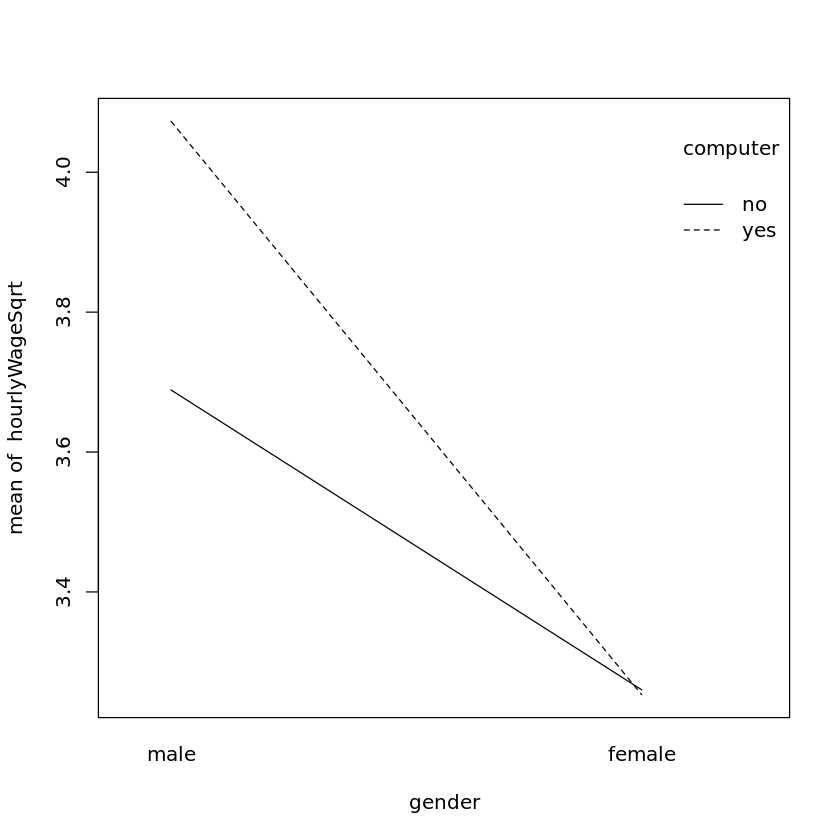

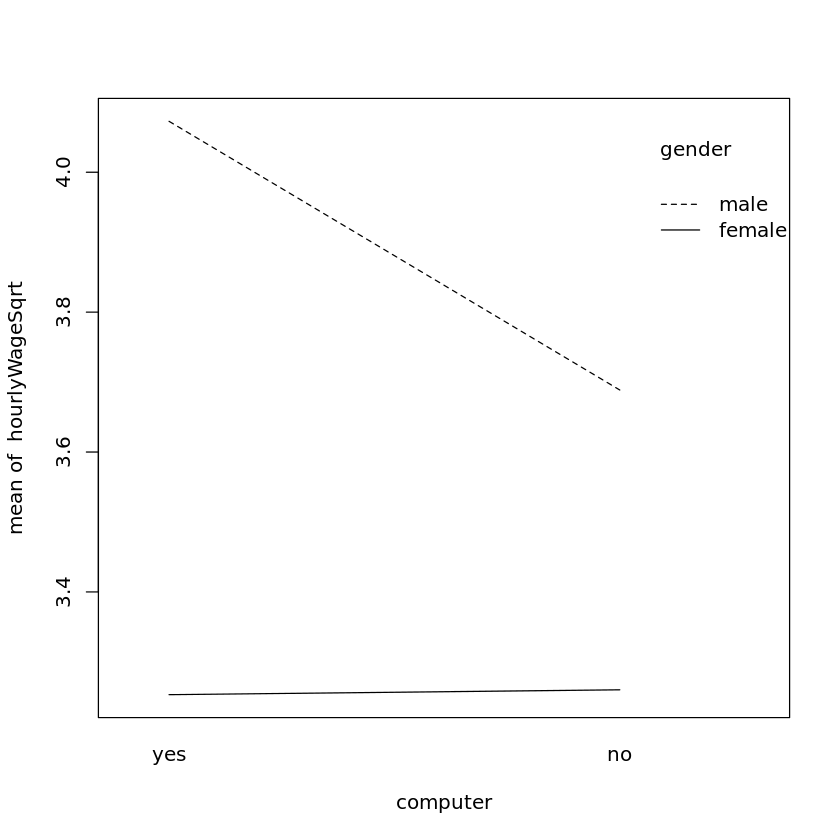

In [7]:
with(wages, {
# Means plot with gender on the horizontal axis 
#  and separate lines for the levels of factor computer
    interaction.plot(gender, computer, hourlyWageSqrt)
# Means plot with computer on the horizontal axis 
#  and separate lines for the levels of factor gender     
    interaction.plot(computer, gender, hourlyWageSqrt)
})

### (ii)

Based on the plots you produced in part (i), is the assumption of no interaction between the factors `gender` and `computer` reasonable?

#### Solution <a class="tocSkip">

The lines aren't parallel in either of the means plots, which suggests that the assumption of no interaction may be questionable. 

A model to address this problem is considered in Section 5 of Unit 4.